# KERNEL CLEAN

In [1]:
%reset -f -s

import gc

# LIBRARIES IMPORT

In [2]:
# imports

import CNN_lib
import CNN_utilities
import fig_lib 

import numpy as np
import matplotlib.pyplot as plt
import pickle

from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
d_type='processed'     # 'processed', 'synthetic'
video_d=True            # Video = True , Image = False 
test_data,number_data_points= False,500

t_btw_frm=0.05

checking_on=True

data_augmentation= True

checkpoint_path = "C:/PROJECTS\emboendo\CNN\python-machine-learning\emboendo_ML\embo_CNN_lab\_static/model_checkpoint.h5"

if d_type=='processed' : pkl_train_p='C:\PROJECTS\emboendo\CNN/pikles/processed_train_d.pkl'  
elif d_type=='synthetic' : pkl_train_p='C:\PROJECTS\emboendo\CNN/pikles/synthetic_train_d.pkl'   
     

# CNN

### GENERATE TRAIN DATA

In [4]:
# X_train,Y_train

with open(pkl_train_p, 'rb') as pikle_file:

    save_trains= pickle.load(pikle_file)

x_train,y_train,rcs =  save_trains[0],save_trains[1],save_trains[2]

max_frm_n, HEIGHT, WIDTH=np.shape(x_train)[1],np.shape(x_train)[2],np.shape(x_train)[3]


### CHECK 1

In [5]:
if checking_on:

    for x,y,r in zip(x_train,y_train,rcs):
        print(r,int(y),np.shape(x),type(x))

I1 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I11 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I2 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I9 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I28 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I33 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I38 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I39 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I40 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I42 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I44 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I45 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I47 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I49 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I51 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I53 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I54 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I56 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I57 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I58 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I61 0 (40, 160, 160, 1) <class 'numpy.ndarr

In [6]:
if checking_on:

    rec_elm='I70'
    idx=rcs.index(rec_elm)
    print(y_train[idx])

1


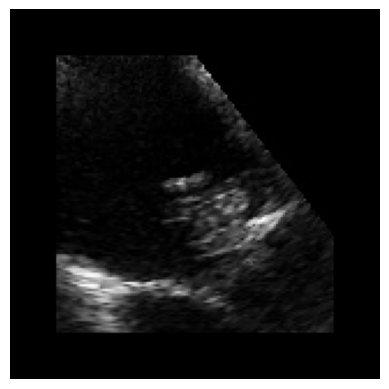

In [7]:
if checking_on:fig_lib.vid_show(x_train[idx],t_btw_frm=t_btw_frm)

In [8]:
if test_data:

    total_data_points=len(y_train)
    test_len=total_data_points-number_data_points
    
    Xx_train=x_train[0:number_data_points]
    Yy_train=y_train[0:number_data_points]
    rcs=rcs[0:number_data_points]

else:

    Xx_train=x_train
    Yy_train=y_train


## DATA SHUFFLE 1

In [9]:
Xx_train,Yy_train,recs=CNN_lib.shuffle(Xx_train,Yy_train,rcs)

### CHECK 2

In [10]:
if checking_on:

    for x,y,r in zip(Xx_train,Yy_train,recs):
        print(r,int(y),np.shape(x),type(x))

I117 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
669183_10 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I1162 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I333 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I542 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I921 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I834 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I623 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I40 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I436 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I267 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
656335_1 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I1117 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
512291_1 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I902 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I1272 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I28 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
109897_7 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
656335_3 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I868 0 (40, 160, 160, 1) <class 'numpy.ndarray'

In [11]:
if checking_on:

    rec_elm='I54'
    idx=recs.index(rec_elm)
    print(idx,Yy_train[idx])

234 0


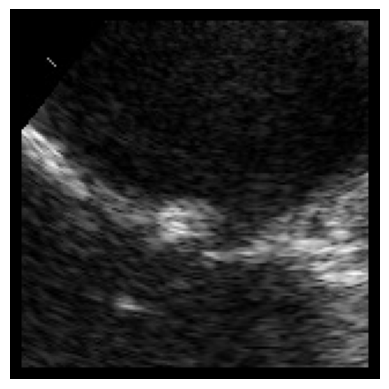

In [12]:
if checking_on:fig_lib.vid_show(Xx_train[idx],t_btw_frm=t_btw_frm)

### DATA SPLIT

In [13]:
test_size=0.2

X_train_spl, X_eval_spl, Y_train_spl, Y_eval_spl = train_test_split(Xx_train, Yy_train, test_size=test_size, shuffle=False) #,random_state=42)

recs_train =recs[0:len(Y_train_spl)]
recs_eval =recs[len(Y_train_spl)::]

print('Train data:',len(Y_train_spl),'Evaluation data:',len(Y_eval_spl))

if test_data:print('Test_len:',test_len)

Train data: 528 Evaluation data: 132


In [14]:
if checking_on:

    rec_elm='I921'
    idx=recs_train.index(rec_elm)
    print(idx,Y_train_spl[idx])


5 1


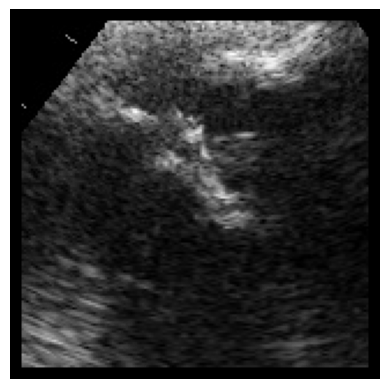

In [15]:
if checking_on:fig_lib.vid_show(X_train_spl[idx],t_btw_frm=t_btw_frm)

 Train data shape: (528, 40, 160, 160, 1)  Validation data shape: (132, 40, 160, 160, 1)


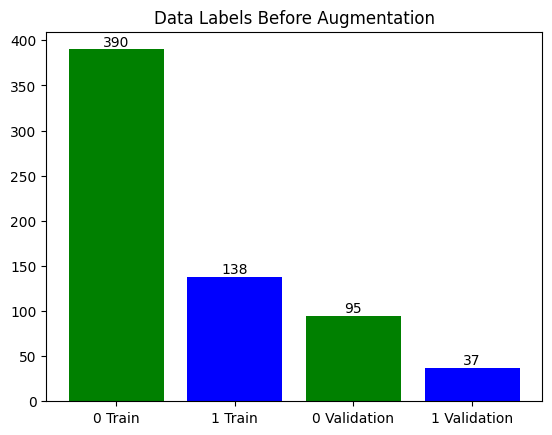

In [16]:
# check data

zeros_count = np.sum(Y_train_spl == 0)
ones_count = np.sum(Y_train_spl == 1)
zeros_count_val = np.sum(Y_eval_spl == 0)
ones_count_val = np.sum(Y_eval_spl == 1)

print(' Train data shape:', np.shape(X_train_spl),' Validation data shape:', np.shape(X_eval_spl))

CNN_lib.data_bars_plot(zeros_count,ones_count,zeros_count_val,ones_count_val)

# DATA AUGMENTATION

In [17]:
if data_augmentation:
    
    n_flip_1=0.8
    n_flip_0=0.08

    nf1 = round(n_flip_1*ones_count)
    nf0 = round(n_flip_0*zeros_count)

    print(f'Flip 1: {nf1}, 0: {nf0}')

    n_rot_1=0.8
    n_rot_0=0.08

    nr1 = round(n_rot_1*ones_count)
    nr0 = round(n_rot_0*zeros_count)

    print(f'Rotation 1: {nr1}, 0: {nr0}')

    n_contr_1=0.4
    n_contr_0=0.04

    nc1 = round(n_contr_1*ones_count)
    nc0 = round(n_contr_0*zeros_count)

    print(f'Contrast 1: {nc1}, 0: {nc0}')

    n_bright_1=0.4
    n_bright_0=0.04

    nb1 = round(n_bright_1*ones_count)
    nb0 = round(n_bright_0*zeros_count)

    print(f'brightness 1: {nb1}, 0: {nb0}')

Flip 1: 110, 0: 31
Rotation 1: 110, 0: 31
Contrast 1: 55, 0: 16
brightness 1: 55, 0: 16


In [18]:

if data_augmentation:

    Flip_X_1,Flip_Y_1,Flip_recs_1=CNN_lib.main_aug_f(nf1,X_train_spl,Y_train_spl,recs,label=1,typ='Flip')
    Flip_X_0,Flip_Y_0,Flip_recs_0=CNN_lib.main_aug_f(nf0,X_train_spl,Y_train_spl,recs,label=0,typ='Flip')

    Rot_X_1,Rot_Y_1,Rot_recs_1=CNN_lib.main_aug_f(nr1,X_train_spl,Y_train_spl,recs,label=1,typ='Rotation')
    Rot_X_0,Rot_Y_0,Rot_recs_0=CNN_lib.main_aug_f(nr0,X_train_spl,Y_train_spl,recs,label=0,typ='Rotation')

    Cntr_X_1,Cntr_Y_1,Cntr_recs_1=CNN_lib.main_aug_f(nc1,X_train_spl,Y_train_spl,recs,label=1,typ='Contrast')
    Cntr_X_0,Cntr_Y_0,Cntr_recs_0=CNN_lib.main_aug_f(nc0,X_train_spl,Y_train_spl,recs,label=0,typ='Contrast')

    Bgr_X_1,Bgr_Y_1,Bgr_recs_1=CNN_lib.main_aug_f(nb1,X_train_spl,Y_train_spl,recs,label=1,typ='Brightness')
    Bgr_X_0,Bgr_Y_0,Bgr_recs_0=CNN_lib.main_aug_f(nb0,X_train_spl,Y_train_spl,recs,label=0,typ='Brightness')


In [19]:
if data_augmentation:

    X_train_spl = np.concatenate((X_train_spl, Flip_X_1,Flip_X_0,Rot_X_1,Rot_X_0,Cntr_X_1,Cntr_X_0,Bgr_X_1,Bgr_X_0), axis=0)
    Y_train_spl = np.concatenate((Y_train_spl, Flip_Y_1,Flip_Y_0,Rot_Y_1,Rot_Y_0,Cntr_Y_1,Cntr_Y_0,Bgr_Y_1,Bgr_Y_0))
    
    recs_train = recs_train+Flip_recs_1+Flip_recs_0+Rot_recs_1+Rot_recs_0+Cntr_recs_1+Cntr_recs_0+Bgr_recs_1+Bgr_recs_0

    print(X_train_spl.shape,Y_train_spl.shape)
    print(X_eval_spl.shape,Y_eval_spl.shape)


(952, 40, 160, 160, 1) (952,)
(132, 40, 160, 160, 1) (132,)


### DATA SHUFFLE 2

In [20]:
if data_augmentation: X_train,Y_train,recs_train_f=CNN_lib.shuffle(X_train_spl,Y_train_spl,recs_train)
else: X_train,Y_train,recs_train_f = X_train_spl,Y_train_spl,recs_train

X_eval=X_eval_spl
Y_eval=Y_eval_spl

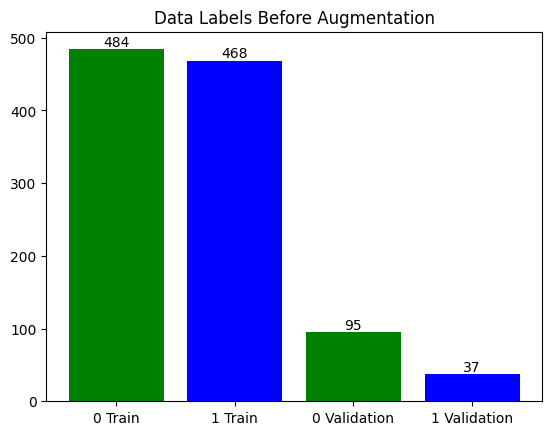

In [21]:
# check data
if data_augmentation:

    zeros_count = np.sum(Y_train == 0)
    ones_count = np.sum(Y_train == 1)
    zeros_count_val = np.sum(Y_eval == 0)
    ones_count_val = np.sum(Y_eval == 1)

    CNN_lib.data_bars_plot(zeros_count,ones_count,zeros_count_val,ones_count_val)

### CHECK 3

In [22]:
if checking_on:

    for x,y,r in zip(X_train,Y_train,recs_train_f):
        print(r,int(y),np.shape(x),type(x))
        

I202 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
669183_4 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I95 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I1042 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
FLIP_660022_5 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
669183_6 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
224436_7 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
224436_15 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
CNTR_I103 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
673676_13 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
CNTR_I1266 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I601 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
BRGHT_I180 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I1155 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I624 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
BRGHT_I101 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
ROT_I87 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
ROT_I73 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I825 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
651399_9

In [26]:

if checking_on:

    rec_elm='I87'
    idx=recs_train_f.index(rec_elm)
    print(idx,Y_train[idx])

706 1.0


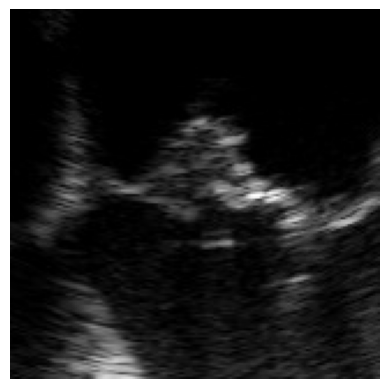

In [27]:
if checking_on:fig_lib.vid_show(X_train[idx],t_btw_frm=t_btw_frm)

#  CNN

In [ ]:
print('LIBRARY MODELS:')
print(' ')

for model_name in CNN_lib.MODELS.values(): print(model_name)

In [ ]:
# -------- CNN PARAMS --------

# -------- MODEL --------

model_from_CNN_lib,mdl= False,'video_conv3D'

opt='adam'
lss='binary_crossentropy'

# -------- TRAINNING --------

epochs=9


### MODEL

In [ ]:
gc.collect()

In [ ]:
# MODEL 



if model_from_CNN_lib:
  
  if video_d: model = CNN_lib.lib_models(mdl,im_input_shp=(max_frm_n, HEIGHT, WIDTH, 1))
  else: model = CNN_lib.lib_models(mdl,im_input_shp=(HEIGHT, WIDTH,1))

else:

  input_shape=(max_frm_n, HEIGHT, WIDTH, 1)

  model = models.Sequential([
          layers.Conv3D(filters=16, kernel_size=(3, 3, 1), activation='relu',input_shape=input_shape),
          layers.MaxPooling3D(pool_size=(2, 2, 2)),
          layers.Conv3D(filters=32, kernel_size=(3, 3, 1),  activation='relu'),
          layers.MaxPooling3D(pool_size=(2, 2, 2)),
          layers.Conv3D(filters=32, kernel_size=(3, 3, 1),  activation='relu'),
          layers.MaxPooling3D(pool_size=(2, 2, 2)),
          layers.Conv3D(filters=16, kernel_size=(1, 1, 5),  activation='relu'),
          layers.Flatten(),
          layers.Dropout(0.2),
          layers.Dense(64, activation='relu'),
          layers.Dense(1,activation='sigmoid')
          ])

model.summary()

In [ ]:
model.compile(optimizer=opt, loss=lss, metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True, monitor='val_loss',   mode='min', verbose=1)

### TRAINNING

In [ ]:

history =model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_eval,Y_eval),callbacks=[checkpoint])

### EVALUATE MODEL

In [ ]:
CNN_lib.plot_train_eval(history,epochs)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_eval,Y_eval,verbose=2)

print(f'Loss: {test_loss}',f'Accuracy: {test_accuracy}')

### BEST EPOCH

In [ ]:
model = load_model(checkpoint_path)
test_loss, test_accuracy = model.evaluate(X_eval,Y_eval,verbose=2)
print(f'Loss: {test_loss}',f'Accuracy: {test_accuracy}')

In [ ]:
performance_d={'NAME':mdl,
               'ACCURACY':test_accuracy,
               'LOSS':test_loss,
               'HEIGHT':HEIGHT,
               'WIDTH':WIDTH}

performance_d

# VALIDATION DATA

In [ ]:
predictions = model.predict(X_eval)
#print(predictions)


## ROC CURVE

In [ ]:
fpr_val, tpr_val, thresholds_val = roc_curve(Y_eval, predictions)
roc_auc_false = auc(fpr_val, tpr_val)

CNN_lib.plot_roc_curve(fpr_val,tpr_val,roc_auc_false)

In [ ]:


"""plt.figure(figsize=(8, 8))

plt.plot(thresholds_val,tpr_val, color='darkorange', lw=2, label='TRUE POSSITIVE')
plt.plot(thresholds_val,fpr_val, color='blue', lw=2, label=f'FALSE pOSSITIVE')
plt.xlabel('Threshold (green)')
plt.ylabel('True/Negative Positive Rate')
plt.title('threshold')
plt.legend()
plt.show()"""

#  FORECAST EVALUATION

In [ ]:
predictions_raw=[]

trsh=0.35

for pred in predictions:

    if pred < trsh:predictions_raw.append(0)
    else:predictions_raw.append(1)

predictions_raw=np.array(predictions_raw)


In [ ]:
conf_matrix = confusion_matrix(Y_eval, predictions_raw)

print("Matriz de Confusión:")
print(conf_matrix)

# Obtener el informe de clasificación
classification_report_str = classification_report(Y_eval, predictions_raw)
print("Informe de Clasificación:")
print(classification_report_str)



In [ ]:
true_classes = Y_eval  

correctly_classified_indices = np.where(predictions_raw == true_classes)[0]
incorrectly_classified_indices = np.where(predictions_raw != true_classes)[0]

correctly_classified_video_ids = [video_id for video_id in correctly_classified_indices]
incorrectly_classified_video_ids = [video_id for video_id in incorrectly_classified_indices]

num_zeros = np.count_nonzero(Y_eval == 0)
num_ones = np.count_nonzero(Y_eval == 1)


In [ ]:
correct_labels_val = [Y_eval[i] for i in correctly_classified_indices]

print(correct_labels_val)

In [ ]:

print(f"OK, {len(correctly_classified_video_ids)}")
print(f"BAD, {len(incorrectly_classified_video_ids)}")
print(f'Ratio forecast: {len(correctly_classified_video_ids)/len(incorrectly_classified_video_ids)}')
print(f'Ratio labeling: {max([num_ones,num_zeros])/min([num_ones,num_zeros])}')


## SINGLE FORECAST

In [ ]:

print(recs_eval)


In [ ]:

rec_elm='I765'
idx=recs_eval.index(rec_elm)


print(f' Record: {rec_elm} , index: {idx}, real label: {Y_eval_spl[idx]}')

In [ ]:
if checking_on:fig_lib.vid_show(X_eval[idx],t_btw_frm=t_btw_frm)

In [ ]:
nuevo_video = np.expand_dims(X_eval[idx], axis=0)

# Realizar la predicción
prediccion = model.predict(nuevo_video)
prediccion